In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_classification


In [3]:
X_train , y_train =make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                                       n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

print(X_train.shape,y_train.shape)

(100, 2) (100,)


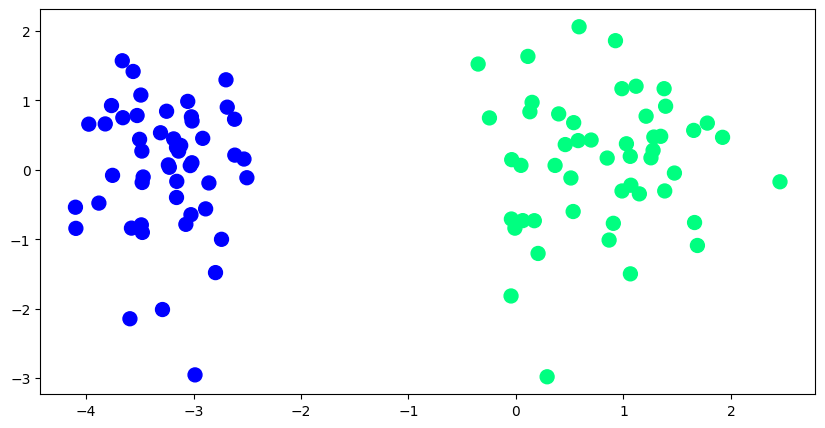

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter',s=100)

In [5]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty=None,solver='sag')
lor.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [6]:
print(lor.coef_)
print(lor.intercept_)

[[4.78157865 0.20448144]]
[5.75128887]


In [7]:
m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1= -(lor.intercept_[0]/lor.coef_[0][1])
print(m1,b1)

-23.383925296328158 -28.126215015724586


In [8]:
x_input= np.linspace(-3,3,100)
y_input= m1*x_input + b1

In [9]:
def gd(X_train,y_train):
  X_train=np.insert(X_train,0,1,axis=1)
  W=np.ones(X_train.shape[1])
  lr=0.5

  for i in range(5000):
    y_hat= sigmoid(np.dot(X_train,W))
    W = W + lr*(np.dot((y_train-y_hat),X_train)/X_train.shape[0])

  return W[1:],W[0]

In [10]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [11]:
coef_,intercept_= gd(X_train,y_train)

In [12]:
print(coef_)
print(intercept_)

[4.83926872 0.21182255]
5.83338864905325


In [13]:
m=-(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])
print(m,b)

-22.84586207917223 -27.5390354119192


In [14]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

(-3.0, 2.0)

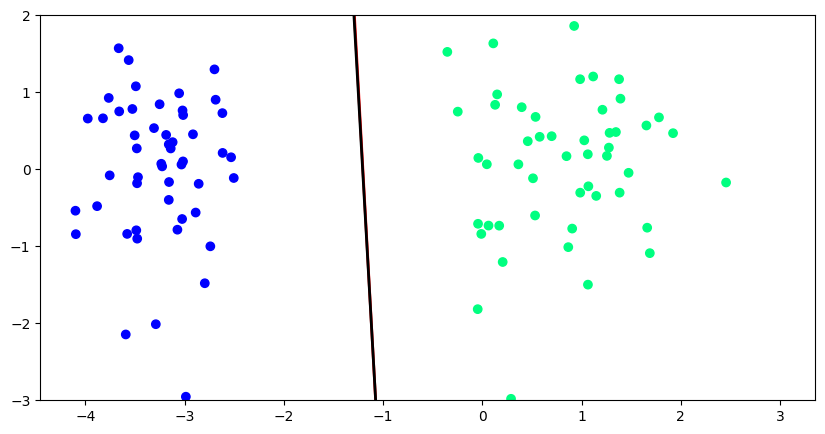

In [15]:
plt.figure(figsize=(10,5))
plt.plot(x_input,y_input, color='red',linewidth=2)
plt.plot(x_input1,y_input1,color='black', linewidth=2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')
plt.ylim(-3,2)